In [1]:
import astropy.units as u
import numpy as np
import gala.potential as gp
import gala.dynamics as gd
from gala.dynamics import mockstream as ms
from gala.units import galactic
from astropy.coordinates import SkyCoord, Distance
#import popsims
import matplotlib.pyplot as plt
#%matplotlib notebook
from tqdm import tqdm
from astropy.constants import G

from gala.units import galactic
import gala.coordinates as gc
import  h5py
import imageio
import seaborn as sns
import matplotlib as mpl
import matplotlib.animation as animation
import astropy.coordinates as astro_coord
import glob
import pandas as pd
sns.set_style("dark")
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
font = {'axes.titlesize'      : 'large',   # fontsize of the axes title
        'axes.labelsize'      : 'large', # fontsize of the x any y labels
        'size'   : 20}
import astropy.units as u
from astropy.io import ascii
import itertools
from scipy import stats
from shapey import Box
import popsims
from scipy import stats
from scipy.signal import find_peaks

path_plot = '/users/caganze/research/stellarstreams/figures/paper/'
path_data = '/users/caganze/research/stellarstreams/data/stream/'
isochrone_path='/users/caganze/research/stellarstreams/data/isochrones/'


In [2]:
#coords standards
_ = astro_coord.galactocentric_frame_defaults.set('v4.0')

#potential and hamiltonian
pot=gp.MilkyWayPotential()
H = gp.Hamiltonian(pot)

#galactocentric reference frame
v_sun = astro_coord.CartesianDifferential([11.1, 220 + 24.0, 7.25]*u.km/u.s)

galcen_frame =astro_coord.Galactocentric(galcen_distance=8.*u.kpc,
                                    galcen_v_sun=v_sun)

In [3]:
def read_stream_file(filename):
    """
    reads in a saved stream run 
    returns the subhalo, progenitor and stream
    """
    print (filename)
    f = h5py.File(path_data+'/'+filename, mode='r')
    
    body=f['nbody']
    stream_cont=f['stream']
    
    #f.close()
    return body, stream_cont

def evolve_stream_in_time(st, time, dt=1*u.Myr, progenitor=False):
    time_dict={'t1': 0*u.Myr, 't2': time, 'dt': dt}
    #make a phase space position objec
    stpos=None
    if progenitor:
        stpos=gd.PhaseSpacePosition(pos=np.array([st.x.value, st.y.value, st.z.value])*st.x.unit,
                              vel=np.array([st.v_x.value, st.v_y.value, st.v_z.value])*st.v_z.unit)
    if not progenitor:
        stpos=gd.PhaseSpacePosition(pos=np.array([st.x, st.y, st.z])*st.x.unit,
                              vel=np.array([st.v_x, st.v_y, st.v_z])*st.v_z.unit)
    final_stream_orbit=gp.Hamiltonian(pot).integrate_orbit(stpos,  **time_dict)
    
    #integrate in time
    new_stream_coord=SkyCoord(x=final_stream_orbit.x[-1], y=final_stream_orbit.y[-1],
                       z= final_stream_orbit.z[-1], v_x=final_stream_orbit.v_x[-1],\
                       v_y=final_stream_orbit.v_y[-1], v_z=final_stream_orbit.v_z[-1],\
                       frame=galcen_frame)
    return new_stream_coord

def read_orbit_file(filename):
    return np.load(path_data+'/{}'.format(filename), allow_pickle=True)

In [117]:
vhalo=50
mstream=1
mhalo='1.00e+07'
mhalos=['1.00e+06', '3.00e+06', '5.00e+06', '7.00e+06', '1.00e+07', '5.00e+07']

In [106]:
float(mhalos[idx])

50000000.0

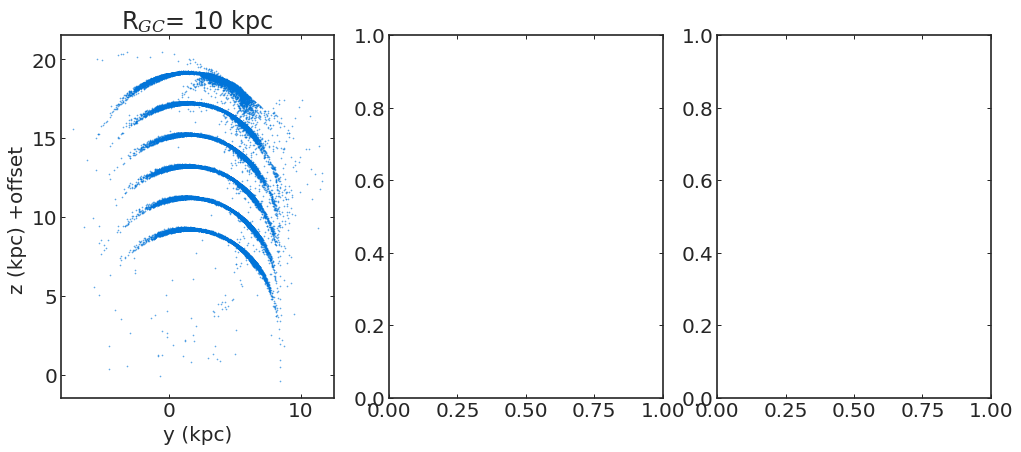

In [133]:
fig, (ax, ax1, ax2)=plt.subplots(ncols=3, figsize=(10*1.5, 4*1.5))

#10 kpc
for idx in range(len(mhalos)):
    filenames=np.array(glob.glob(path_data+'/*mass_{}_times_pal5_rgc10*_mhalo{}*vhalo{}_*.npy'.format(mstream,mhalos[idx], vhalo)))
    st=(read_orbit_file(filenames[0].split('/')[-1]).flatten()[0])['stream']
    evolved_st= evolve_stream_in_time(st, 0.5*u.Gyr)
    ax.scatter(evolved_st.y,evolved_st.z.value+2*idx, s=0.1,  color='#0074D9')
    #ax.text(8, np.nanmedian(evolved_st.z.value+idx*2-0.5) , \
    #        " Msub = {:.0e} Msun ".format(float(mhalos[idx])) ,c='#111111', fontsize=7)
    
ax.set(title=r'R$_{GC}$= 10 kpc',  xlabel='y (kpc)', ylabel='z (kpc) +offset ')

if False:
    #30 kpc
    for idx in range(len(mhalos)):
        filenames=np.array(glob.glob(path_data+'/*mass_{}_times_pal5_rgc30*_mhalo{}*vhalo{}_*.npy'.format(mstream,mhalos[idx], vhalo)))
        st=(read_orbit_file(filenames[0].split('/')[-1]).flatten()[0])['stream']
        evolved_st= evolve_stream_in_time(st, 1.*u.Gyr)
        ax1.scatter(st.y,st.z.value+4*idx, s=0.05,  color='#0074D9')
        ax1.text(5, np.nanmedian(st.z.value+idx*4-0.7) , \
                " Msub = {:.0e} Msun ".format(float(mhalos[idx])) ,c='#111111', fontsize=7)

    ax1.set(title=r'R$_{GC}$= 30 kpc', xlabel='y (kpc)', ylabel='z (kpc) +offset ')

    #50 kpc
    for idx in range(len(mhalos)):
        filenames=np.array(glob.glob(path_data+'/*mass_{}_times_pal5_rgc50*_mhalo{}*vhalo{}_*.npy'.format(mstream,mhalos[idx], vhalo)))
        st=(read_orbit_file(filenames[0].split('/')[-1]).flatten()[0])['stream']
        evolved_st= evolve_stream_in_time(st, 1.*u.Gyr)
        ax2.scatter(st.y,st.z.value+4*idx, s=0.05,  color='#0074D9')
        ax2.text(5, np.nanmedian(st.z.value+idx*4-0.7) , \
                " Msub = {:.0e} Msun ".format(float(mhalos[idx])) ,c='#111111', fontsize=7)

    ax2.set(title=r'R$_{GC}$= 50 kpc', xlabel='y (kpc)', ylabel='z (kpc) +offset ')
    plt.tight_layout()

In [135]:
filenames=np.array(glob.glob(path_data+'/*mass_{}_times_pal5_rgc10*_mhalo{}*vhalo{}_*.npy'.format(mstream,\
                                                                                        '5.00e+06', vhalo)))
st=(read_orbit_file(filenames[0].split('/')[-1]).flatten()[0])['stream']
evolved_st= evolve_stream_in_time(st, 0.5*u.Gyr)

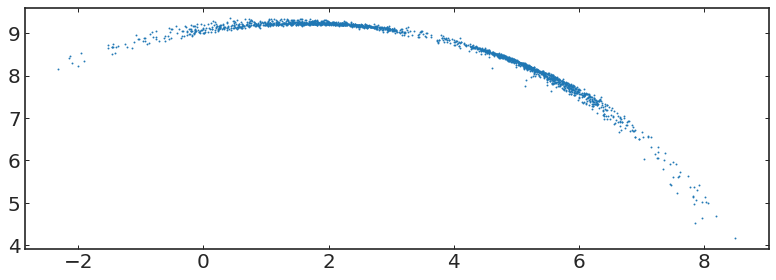

In [136]:
fig, ax=plt.subplots(figsize=(12, 4))
ax.scatter(evolved_st.y[::5], evolved_st.z[::5], s=0.5, alpha=1)
#ax.scatter(-5, 50, s=100, marker='x')
#ax.set(ylim=[46, 55], xlim=[-10, 10])

In [140]:
import os 
os.path.realpath(np.__file__)

'/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/numpy/__init__.py'

In [142]:
cwd = os.getcwd()

In [143]:
cwd

'/Users/caganze/research/stellarstreams/notebooks'